In [ ]:
#Etapa 1 - Entendimento do problema:
#Analise de risco no transporte publico baseando-se no relatório cedido pelo Departamento de 
#TRansporte de Londres dos incidentes em suas vias.

#Responder às 10 perguntas:

#1- Qual a quantidade de incidentes por gênero?
#2- Qual faixa etária esteve mais envolvida nos incidentes?
#3- Qual o percentual de incidentes por tipo de evento (Incident Event Type)?
#4- Como foi a evolução de incidentes por mês ao longo do tempo?
#5- Quando o incidente foi “Collision Incident” em qual mês houve o maior número de incidentes envolvendo pessoas do sexo feminino?
#6- Qual foi a média de incidentes por mês envolvendo crianças (Child)?
#7- Considerandoadescriçãodeincidentecomo“Injuriestreatedonscene” (coluna Injury Result Description), qual o total de incidentes de pessoas do sexo masculino e sexo feminino?
#8- No ano de 2017 em qual mês houve mais incidentes com idosos (Elderly)?
#9- Considerando o Operador qual a distribuição de incidentes ao longo do tempo?
#10- Qual o tipo de incidente mais comum com ciclistas?

In [1]:
#Importando as principais bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
#Etapa 2 - Exploração dos dados:

In [3]:
#lendo o Data Frame
df=pd.read_csv('tfl_bus_safety.csv')

In [4]:
#Amostra
df.head()

,year,date_of_incident,route,operator,group_name,bus_garage,borough,injury_result_description,incident_event_type,victim_category,victims_sex,victims_age
0,2015,2015-01-01,1,London General,Go-Ahead,Garage Not Available,Southwark,Injuries treated on scene,Onboard Injuries,Passenger,Male,Child
1,2015,2015-01-01,4,Metroline,Metroline,Garage Not Available,Islington,Injuries treated on scene,Onboard Injuries,Passenger,Male,Unknown
2,2015,2015-01-01,5,East London,Stagecoach,Garage Not Available,Havering,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly
3,2015,2015-01-01,5,East London,Stagecoach,Garage Not Available,None London Borough,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly
4,2015,2015-01-01,6,Metroline,Metroline,Garage Not Available,Westminster,Reported Minor Injury - Treated at Hospital,Onboard Injuries,Pedestrian,Female,Elderly


In [5]:
df.shape

(23158, 12)

In [6]:
df.describe()

,year
count,23158.000000
mean,2016.449607
std,1.074073
min,2015.000000
25%,2016.000000
50%,2016.000000
75%,2017.000000
max,2018.000000


In [7]:
df.dtypes

year                          int64
date_of_incident             object
route                        object
operator                     object
group_name                   object
bus_garage                   object
borough                      object
injury_result_description    object
incident_event_type          object
victim_category              object
victims_sex                  object
victims_age                  object
dtype: object

In [8]:
df.isna().any()

year                         False
date_of_incident             False
route                        False
operator                     False
group_name                   False
bus_garage                   False
borough                      False
injury_result_description    False
incident_event_type          False
victim_category              False
victims_sex                  False
victims_age                  False
dtype: bool

In [11]:
df.duplicated(keep=False).sum()

3057

In [14]:
df=df.drop_duplicates()

In [15]:
df.shape

(21464, 12)

In [16]:
df.date_of_incident=pd.to_datetime(df.date_of_incident)

In [18]:
df.year=pd.to_datetime(df.year)

In [19]:
df.dtypes

year                         datetime64[ns]
date_of_incident             datetime64[ns]
route                                object
operator                             object
group_name                           object
bus_garage                           object
borough                              object
injury_result_description            object
incident_event_type                  object
victim_category                      object
victims_sex                          object
victims_age                          object
dtype: object

In [21]:
df.nunique()

year                           4
date_of_incident              45
route                        612
operator                      25
group_name                    14
bus_garage                    84
borough                       35
injury_result_description      4
incident_event_type           10
victim_category               17
victims_sex                    3
victims_age                    5
dtype: int64

In [23]:
for col in df.columns:
    valores_unicos = df[col].unique()
    print(f"Valores únicos na coluna '{col}':")
    print(valores_unicos)
    print()


Valores únicos na coluna 'year':
['1970-01-01T00:00:00.000002015' '1970-01-01T00:00:00.000002016'
 '1970-01-01T00:00:00.000002017' '1970-01-01T00:00:00.000002018']

Valores únicos na coluna 'date_of_incident':
['2015-01-01T00:00:00.000000000' '2015-04-01T00:00:00.000000000'
 '2015-05-01T00:00:00.000000000' '2015-06-01T00:00:00.000000000'
 '2015-02-01T00:00:00.000000000' '2015-03-01T00:00:00.000000000'
 '2015-07-01T00:00:00.000000000' '2015-08-01T00:00:00.000000000'
 '2015-09-01T00:00:00.000000000' '2015-10-01T00:00:00.000000000'
 '2015-11-01T00:00:00.000000000' '2015-12-01T00:00:00.000000000'
 '2016-01-01T00:00:00.000000000' '2016-10-01T00:00:00.000000000'
 '2016-11-01T00:00:00.000000000' '2016-12-01T00:00:00.000000000'
 '2016-04-01T00:00:00.000000000' '2016-05-01T00:00:00.000000000'
 '2016-06-01T00:00:00.000000000' '2016-07-01T00:00:00.000000000'
 '2016-08-01T00:00:00.000000000' '2016-09-01T00:00:00.000000000'
 '2016-02-01T00:00:00.000000000' '2016-03-01T00:00:00.000000000'
 '2017-01-

In [26]:
df.loc[df['victims_sex'] == 'Unknown']

,year,date_of_incident,route,operator,group_name,bus_garage,borough,injury_result_description,incident_event_type,victim_category,victims_sex,victims_age
7,1970-01-01 00:00:00.000002015,2015-01-01,9,London United,London United,Garage Not Available,Hammersmith & Fulham,Injuries treated on scene,Onboard Injuries,Conductor,Unknown,Unknown
16,1970-01-01 00:00:00.000002015,2015-01-01,14,London General,Go-Ahead,Garage Not Available,Kensington & Chelsea,Injuries treated on scene,Onboard Injuries,Passenger,Unknown,Unknown
17,1970-01-01 00:00:00.000002015,2015-01-01,14,London General,Go-Ahead,Garage Not Available,Westminster,Reported Minor Injury - Treated at Hospital,Collision Incident,Pedestrian,Unknown,Unknown
18,1970-01-01 00:00:00.000002015,2015-01-01,16,Metroline,Metroline,Garage Not Available,Brent,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Unknown,Adult
20,1970-01-01 00:00:00.000002015,2015-01-01,18,Metroline West,Metroline,Garage Not Available,Brent,Injuries treated on scene,Onboard Injuries,Passenger,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
23112,1970-01-01 00:00:00.000002018,2018-09-01,E7,Abellio West,Abellio,Southall,Ealing,Reported Minor Injury - Treated at Hospital,Slip Trip Fall,Passenger,Unknown,Unknown
23113,1970-01-01 00:00:00.000002018,2018-09-01,E9,Abellio West,Abellio,Southall,Ealing,Reported Minor Injury - Treated at Hospital,Slip Trip Fall,Passenger,Unknown,Unknown
23137,1970-01-01 00:00:00.000002018,2018-09-01,P4,Selkent,Stagecoach,Catford,Lewisham,Injuries treated on scene,Personal Injury,Passenger,Unknown,Unknown
23148,1970-01-01 00:00:00.000002018,2018-09-01,E1,Abellio West,Abellio,Southall,Ealing,Taken to Hospital – Reported Serious Injury or...,Slip Trip Fall,Passenger,Unknown,Unknown


In [28]:
df.loc[df['victims_sex'] == 'Unknown'].count()

year                         3115
date_of_incident             3115
route                        3115
operator                     3115
group_name                   3115
bus_garage                   3115
borough                      3115
injury_result_description    3115
incident_event_type          3115
victim_category              3115
victims_sex                  3115
victims_age                  3115
dtype: int64

In [29]:
df.loc[df['victims_age'] == 'Unknown']

,year,date_of_incident,route,operator,group_name,bus_garage,borough,injury_result_description,incident_event_type,victim_category,victims_sex,victims_age
1,1970-01-01 00:00:00.000002015,2015-01-01,4,Metroline,Metroline,Garage Not Available,Islington,Injuries treated on scene,Onboard Injuries,Passenger,Male,Unknown
7,1970-01-01 00:00:00.000002015,2015-01-01,9,London United,London United,Garage Not Available,Hammersmith & Fulham,Injuries treated on scene,Onboard Injuries,Conductor,Unknown,Unknown
15,1970-01-01 00:00:00.000002015,2015-01-01,12,London Central,Go-Ahead,Garage Not Available,Westminster,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Female,Unknown
16,1970-01-01 00:00:00.000002015,2015-01-01,14,London General,Go-Ahead,Garage Not Available,Kensington & Chelsea,Injuries treated on scene,Onboard Injuries,Passenger,Unknown,Unknown
17,1970-01-01 00:00:00.000002015,2015-01-01,14,London General,Go-Ahead,Garage Not Available,Westminster,Reported Minor Injury - Treated at Hospital,Collision Incident,Pedestrian,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
23132,1970-01-01 00:00:00.000002018,2018-09-01,N73,Arriva London North,Arriva London,Stamford Hill,Hackney,Injuries treated on scene,Slip Trip Fall,Passenger,Female,Unknown
23137,1970-01-01 00:00:00.000002018,2018-09-01,P4,Selkent,Stagecoach,Catford,Lewisham,Injuries treated on scene,Personal Injury,Passenger,Unknown,Unknown
23141,1970-01-01 00:00:00.000002018,2018-09-01,U3,Metroline West,Metroline,Uxbridge,Hillingdon,Injuries treated on scene,Personal Injury,Passenger,Female,Unknown
23148,1970-01-01 00:00:00.000002018,2018-09-01,E1,Abellio West,Abellio,Southall,Ealing,Taken to Hospital – Reported Serious Injury or...,Slip Trip Fall,Passenger,Unknown,Unknown


In [30]:
df.loc[df['victims_age'] == 'Unknown'].count()

year                         6423
date_of_incident             6423
route                        6423
operator                     6423
group_name                   6423
bus_garage                   6423
borough                      6423
injury_result_description    6423
incident_event_type          6423
victim_category              6423
victims_sex                  6423
victims_age                  6423
dtype: int64

In [ ]:
#Nesse ponto ja verificamos que nao ha valores ausentes e nao ha mais duplicadas.
#Todas as colunas sao categoricas com excecao da coluna 'year' e 'date_of_incidente' que passamos para o formato datetime
#O dataset apresenta incidentes de 2015 a 2018

In [ ]:
#1- Qual a quantidade de incidentes por gênero?

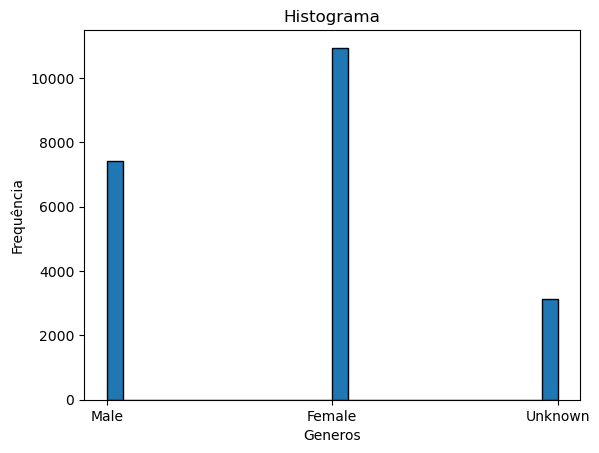

In [34]:
plt.hist(df['victims_sex'], bins='auto', edgecolor='black')
plt.xlabel('Generos')
plt.ylabel('Frequência')
plt.title('Histograma')
plt.show()

In [33]:
#2- Qual faixa etária esteve mais envolvida nos incidentes?

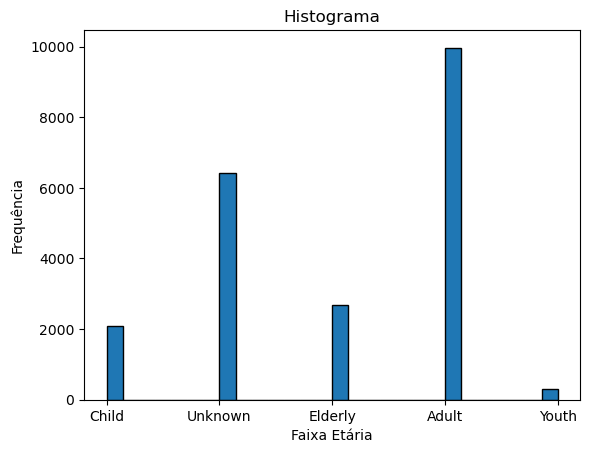

In [35]:
plt.hist(df['victims_age'], bins='auto', edgecolor='black')
plt.xlabel('Faixa Etária')
plt.ylabel('Frequência')
plt.title('Histograma')
plt.show()

In [ ]:
#3- Qual o percentual de incidentes por tipo de evento (Incident Event Type)?

In [37]:
value_counts=df['incident_event_type'].value_counts()
porcentagem=value_counts/len(df)*100
print(porcentagem)

Slip Trip Fall             30.553485
Onboard Injuries           27.585725
Personal Injury            20.233880
Collision Incident         17.783265
Assault                     2.674245
Activity Incident Event     0.517145
Vandalism Hooliganism       0.330786
Safety Critical Failure     0.284197
Fire                        0.023295
Robbery                     0.013977
Name: incident_event_type, dtype: float64


In [ ]:
#4- Como foi a evolução de incidentes por mês ao longo do tempo?

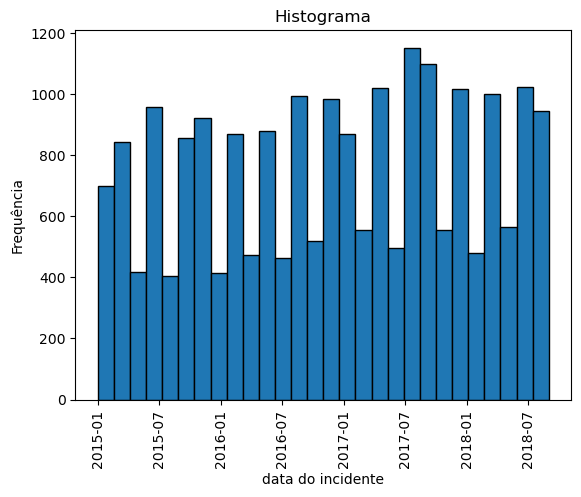

In [43]:
plt.hist(df['date_of_incident'], bins='auto', edgecolor='black')
plt.xlabel('data do incidente')
plt.ylabel('Frequência')
plt.title('Histograma')
plt.xticks(rotation=90)
plt.show()

In [54]:
#5- Quando o incidente foi “Collision Incident” em qual mês houve o maior número de incidentes envolvendo pessoas do sexo feminino?
df_filtrado=df[(df['incident_event_type']=='Collision Incident') & (df['victims_sex']=='Female')]
df_filtrado1=df_filtrado['date_of_incident'].value_counts()
df_filtrado1

2016-11-01    54
2017-07-01    47
2017-08-01    47
2016-09-01    46
2017-11-01    45
2017-01-01    44
2017-03-01    44
2016-10-01    42
2016-06-01    42
2015-09-01    40
2016-04-01    39
2017-02-01    38
2017-10-01    38
2018-01-01    37
2016-05-01    36
2016-07-01    35
2017-04-01    34
2018-06-01    32
2015-04-01    32
2016-01-01    30
2018-05-01    30
2015-06-01    30
2018-04-01    29
2016-08-01    29
2016-03-01    29
2017-09-01    28
2018-09-01    28
2015-11-01    28
2015-07-01    28
2017-06-01    26
2018-03-01    26
2016-12-01    25
2017-05-01    25
2015-10-01    25
2015-05-01    25
2015-12-01    24
2015-02-01    24
2018-02-01    24
2015-03-01    22
2016-02-01    21
2018-07-01    20
2017-12-01    19
2015-08-01    19
2018-08-01    18
2015-01-01    16
Name: date_of_incident, dtype: int64

In [58]:
#6- Qual foi a média de incidentes por mês envolvendo crianças (Child)?
df_child=df[df['victims_age']=='Child']
valuecri=df_child['date_of_incident'].value_counts()
valuecri.mean()

46.266666666666666

In [61]:
#7- Considerando a descrição de incidente como“Injuries treated on scene” (coluna Injury Result Description), qual o total de incidentes de pessoas do sexo masculino e sexo feminino?
df[df['injury_result_description']=='Injuries treated on scene']['victims_sex'].value_counts()

Female     8070
Male       5389
Unknown    2474
Name: victims_sex, dtype: int64

In [63]:
#8- No ano de 2017 em qual mês houve mais incidentes com idosos (Elderly)?
df['ano'] = df['date_of_incident'].dt.year
df.head()


,year,date_of_incident,route,operator,group_name,bus_garage,borough,injury_result_description,incident_event_type,victim_category,victims_sex,victims_age,ano
0,1970-01-01 00:00:00.000002015,2015-01-01,1,London General,Go-Ahead,Garage Not Available,Southwark,Injuries treated on scene,Onboard Injuries,Passenger,Male,Child,2015
1,1970-01-01 00:00:00.000002015,2015-01-01,4,Metroline,Metroline,Garage Not Available,Islington,Injuries treated on scene,Onboard Injuries,Passenger,Male,Unknown,2015
2,1970-01-01 00:00:00.000002015,2015-01-01,5,East London,Stagecoach,Garage Not Available,Havering,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly,2015
3,1970-01-01 00:00:00.000002015,2015-01-01,5,East London,Stagecoach,Garage Not Available,None London Borough,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly,2015
4,1970-01-01 00:00:00.000002015,2015-01-01,6,Metroline,Metroline,Garage Not Available,Westminster,Reported Minor Injury - Treated at Hospital,Onboard Injuries,Pedestrian,Female,Elderly,2015


In [84]:
df[(df['ano']==2017)&(df['victims_age']=='Elderly')]['date_of_incident'].value_counts()


2017-07-01    81
2017-09-01    77
2017-03-01    73
2017-04-01    73
2017-08-01    69
2017-05-01    67
2017-11-01    67
2017-01-01    65
2017-12-01    65
2017-06-01    64
2017-10-01    64
2017-02-01    52
Name: date_of_incident, dtype: int64

In [86]:
#9- Considerando o Operador qual a distribuição de incidentes ao longo do tempo?
incident_count_by_operator = df.groupby(['operator', df['date_of_incident'].dt.month]).size().unstack()
incident_count_by_operator

date_of_incident,1,2,3,4,5,6,7,8,9,10,11,12
operator,,,,,,,,,,,,
Abellio London,79.0,62.0,70.0,69.0,74.0,80.0,76.0,86.0,84.0,80.0,76.0,67.0
Abellio West,11.0,7.0,9.0,14.0,18.0,12.0,7.0,5.0,9.0,10.0,11.0,11.0
Arriva Kent Thameside,17.0,13.0,17.0,15.0,5.0,8.0,4.0,10.0,2.0,2.0,1.0,6.0
Arriva London North,178.0,241.0,313.0,260.0,274.0,277.0,288.0,222.0,267.0,229.0,212.0,167.0
Arriva London South,103.0,117.0,127.0,166.0,145.0,151.0,160.0,147.0,138.0,102.0,108.0,101.0
Arriva The Shires,64.0,42.0,7.0,13.0,23.0,20.0,16.0,19.0,23.0,26.0,11.0,11.0
Blue Triangle Buses,29.0,25.0,25.0,21.0,31.0,30.0,12.0,16.0,22.0,15.0,18.0,8.0
C T Plus,2.0,8.0,11.0,10.0,5.0,9.0,11.0,6.0,7.0,4.0,2.0,1.0
Docklands Buses,8.0,8.0,4.0,15.0,4.0,9.0,5.0,8.0,13.0,7.0,8.0,7.0


In [88]:
#10- Qual o tipo de incidente mais comum com ciclistas?
df[df['victim_category']== 'Cyclist']['incident_event_type'].value_counts()

Collision Incident    250
Personal Injury         8
Slip Trip Fall          7
Onboard Injuries        4
Name: incident_event_type, dtype: int64